### EAI 6020 Final Project 

### Predicting Claim-to-Incident Conversion for Long-Term Disability Insurance Using Explainable Machine Learning

#### - Presented by : Rhythm Billore


#### Project Introduction

**Project Overview**

This project focuses on exploratory data analysis (EDA) for a long-term disability (LTD) insurance use case, with the objective of understanding claim-level and policyholder-level characteristics that may influence whether an LTD claim progresses to an incident.

The analysis serves two primary purposes:

1. To validate data quality, structure, and distributions before modeling.

2. To uncover meaningful patterns related to demographics, employment characteristics, coverage design, and claim behavior that are relevant to insurance risk assessment.

The insights from this EDA inform downstream feature engineering and modeling decisions for a binary classification problem.

**Dataset Overview**

The dataset contains 10,000 policy records with 24 variables, representing a synthetic but insurance-realistic LTD portfolio. The features span multiple domains commonly available at claim intake:

Demographics (e.g., age, gender, state)

Employment characteristics (e.g., industry, occupation class, hours worked, tenure)

Coverage and plan design (e.g., elimination period, benefit percentage, benefit duration)

Claim outcomes (e.g., claim incident indicator, claim duration, return-to-work flag)

The target variable, claim_incident, is binary and indicates whether a claim resulted in a long-term disability incident.

#### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Dataset

In [3]:
df_data = pd.read_excel("data/synthetic_ltd_claims_soa_expanded.xlsx")

In [4]:
df_data.head()

,policy_id,age,gender,state,industry,occupation_class,salary_band,elimination_period_days,benefit_pct,coverage_type,...,ssdi_offset_indicator,hours_worked_per_week,employment_status,exposure_year,coverage_start_year,claim_incident,incurred_year,claim_duration_months,recovery_status,return_to_work_flag
0,1,58,M,MA,Healthcare,4,60-80k,90,0.6,EmployerPaid,...,0,40,FullTime,2019,2018,0,NaN,0,NaN,0
1,2,48,F,RI,Services,1,40-60k,30,0.6,EmployerPaid,...,0,40,FullTime,2020,2018,0,NaN,0,NaN,0
2,3,34,F,NY,Services,3,40-60k,90,0.6,EmployerPaid,...,0,40,FullTime,2019,2011,0,NaN,0,NaN,0
3,4,62,F,NJ,Education,2,80-120k,90,0.7,EmployerPaid,...,0,35,FullTime,2019,2011,0,NaN,0,NaN,0
4,5,27,F,RI,Retail,3,80-120k,90,0.6,EmployerPaid,...,0,40,FullTime,2019,2017,0,NaN,0,NaN,0


#### Data Structure & Quality Checks

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   policy_id                10000 non-null  int64  
 1   age                      10000 non-null  int64  
 2   gender                   10000 non-null  object 
 3   state                    10000 non-null  object 
 4   industry                 10000 non-null  object 
 5   occupation_class         10000 non-null  int64  
 6   salary_band              10000 non-null  object 
 7   elimination_period_days  10000 non-null  int64  
 8   benefit_pct              10000 non-null  float64
 9   coverage_type            10000 non-null  object 
 10  years_with_employer      10000 non-null  float64
 11  benefit_duration         10000 non-null  object 
 12  max_monthly_benefit      10000 non-null  int64  
 13  integration_type         5954 non-null   object 
 14  ssdi_offset_indicator  

#### Missing Value Assessment

In [6]:
df_data.isnull().count()

policy_id                  10000
age                        10000
gender                     10000
state                      10000
industry                   10000
occupation_class           10000
salary_band                10000
elimination_period_days    10000
benefit_pct                10000
coverage_type              10000
years_with_employer        10000
benefit_duration           10000
max_monthly_benefit        10000
integration_type           10000
ssdi_offset_indicator      10000
hours_worked_per_week      10000
employment_status          10000
exposure_year              10000
coverage_start_year        10000
claim_incident             10000
incurred_year              10000
claim_duration_months      10000
recovery_status            10000
return_to_work_flag        10000
dtype: int64

#### Descriptive Statistics

In [7]:
df_data.describe()

,policy_id,age,occupation_class,elimination_period_days,benefit_pct,years_with_employer,max_monthly_benefit,ssdi_offset_indicator,hours_worked_per_week,exposure_year,coverage_start_year,claim_incident,incurred_year,claim_duration_months,return_to_work_flag
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,79.000000,10000.000000,10000.000000
mean,5000.50000,42.494900,2.497600,93.003000,0.580350,5.016630,3376.163000,0.296200,35.005000,2020.516800,2016.539400,0.007900,2020.658228,0.158000,0.005600
std,2886.89568,13.162298,1.025036,47.189985,0.087428,4.922311,1735.754226,0.456603,6.135042,1.122784,3.627363,0.088535,1.269828,2.681446,0.074627
min,1.00000,20.000000,1.000000,30.000000,0.400000,0.000000,710.000000,0.000000,20.000000,2019.000000,2009.000000,0.000000,2019.000000,0.000000,0.000000
25%,2500.75000,31.000000,2.000000,60.000000,0.500000,1.400000,2020.000000,0.000000,30.000000,2020.000000,2014.000000,0.000000,2020.000000,0.000000,0.000000
50%,5000.50000,42.000000,2.000000,90.000000,0.600000,3.500000,3010.000000,0.000000,40.000000,2021.000000,2017.000000,0.000000,2021.000000,0.000000,0.000000
75%,7500.25000,54.000000,3.000000,90.000000,0.600000,7.100000,4390.000000,1.000000,40.000000,2022.000000,2019.000000,0.000000,2022.000000,0.000000,0.000000
max,10000.00000,65.000000,4.000000,180.000000,0.700000,30.000000,10540.000000,1.000000,40.000000,2022.000000,2022.000000,1.000000,2023.000000,120.000000,1.000000


#### Categorical Feature Distribution Analysis

In [8]:
df_data.gender.value_counts()

gender
M    5009
F    4991
Name: count, dtype: int64

In [9]:
df_data.state.value_counts()

state
MA    1146
RI    1135
VT    1132
NY    1116
ME    1116
NH    1115
NJ    1104
PA    1071
CT    1065
Name: count, dtype: int64

In [10]:
df_data.industry.value_counts()

industry
Healthcare       1777
Education        1219
Manufacturing    1218
Technology       1059
Services          991
Finance           987
Retail            981
PublicSector      968
Construction      800
Name: count, dtype: int64

In [13]:
df_data.columns

Index(['policy_id', 'age', 'gender', 'state', 'industry', 'occupation_class',
       'salary_band', 'elimination_period_days', 'benefit_pct',
       'coverage_type', 'years_with_employer', 'benefit_duration',
       'max_monthly_benefit', 'integration_type', 'ssdi_offset_indicator',
       'hours_worked_per_week', 'employment_status', 'exposure_year',
       'coverage_start_year', 'claim_incident', 'incurred_year',
       'claim_duration_months', 'recovery_status', 'return_to_work_flag'],
      dtype='object')

In [12]:
df_data.head()

,policy_id,age,gender,state,industry,occupation_class,salary_band,elimination_period_days,benefit_pct,coverage_type,...,ssdi_offset_indicator,hours_worked_per_week,employment_status,exposure_year,coverage_start_year,claim_incident,incurred_year,claim_duration_months,recovery_status,return_to_work_flag
0,1,58,M,MA,Healthcare,4,60-80k,90,0.6,EmployerPaid,...,0,40,FullTime,2019,2018,0,NaN,0,NaN,0
1,2,48,F,RI,Services,1,40-60k,30,0.6,EmployerPaid,...,0,40,FullTime,2020,2018,0,NaN,0,NaN,0
2,3,34,F,NY,Services,3,40-60k,90,0.6,EmployerPaid,...,0,40,FullTime,2019,2011,0,NaN,0,NaN,0
3,4,62,F,NJ,Education,2,80-120k,90,0.7,EmployerPaid,...,0,35,FullTime,2019,2011,0,NaN,0,NaN,0
4,5,27,F,RI,Retail,3,80-120k,90,0.6,EmployerPaid,...,0,40,FullTime,2019,2017,0,NaN,0,NaN,0


#### Data distribution

In [14]:
df_data_cont_cols = ['age','elimination_period_days','benefit_pct','years_with_employer','occupation_class','hours_worked_per_week','claim_duration_months','salary_band']

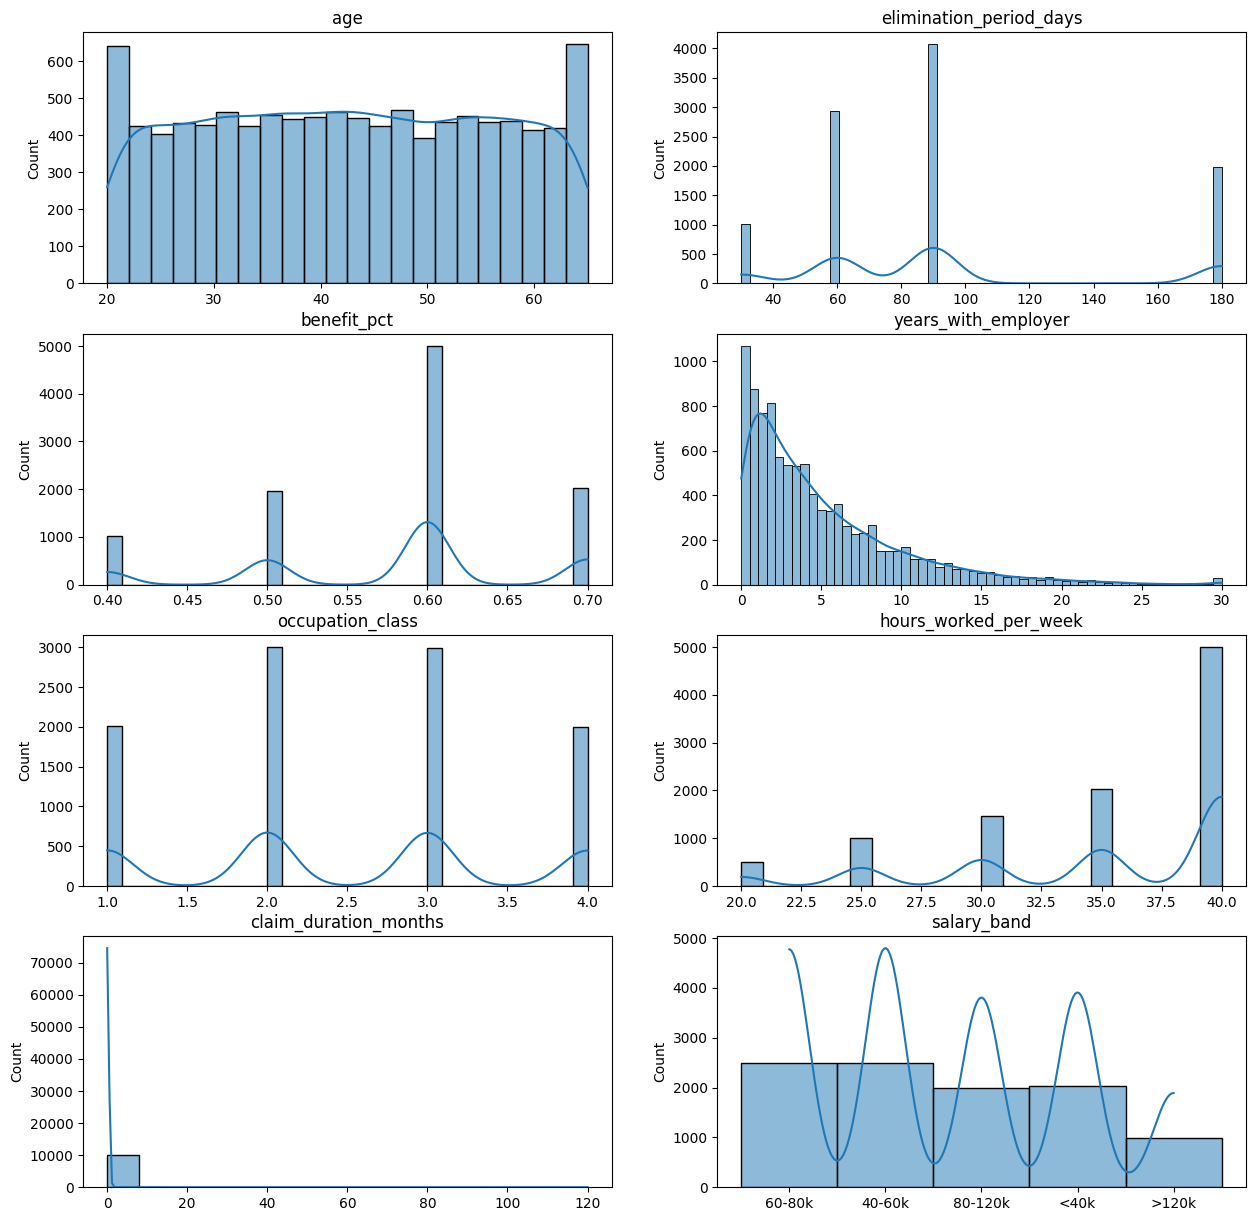

In [18]:
fig,ax = plt.subplots(4,2,figsize=(15,15))
for i,col in enumerate (df_data_cont_cols):
    r = i//2
    c = i%2
    sns.histplot(df_data[col],ax = ax[r,c],kde=True)
    ax[r,c].set_title(col)
    ax[r,c].set_xlabel("")

#### Interpretations :

- People in the dataset are mostly working-age adults, spread fairly evenly from their early 20s to their early 60s. No age group dominates.
- Most people have standard waiting periods like 30, 60, 90, or 180 days before benefits start.
- Benefit percentages cluster around standardized replacement rates (≈40%, 50%, 60%, 70%), again reflecting plan design rather than continuous variation across individuals.Benefit percentages are not random - most people have set replacement rates like 40%, 50%, 60%, or 70% of income, reflecting how LTD plans are designed.
- Many people are relatively new to their job (0-5 years), while fewer have been with their employer for a long time. There’s a long tail of long-tenured employees.
- Occupation class is grouped into a few categories, and the dataset mainly falls into the standard 1 - 4 classes, consistent with how insurers classify job risk.
- Most people work full-time at around 35-40 hours per week. Part - time workers appear less frequently.
- Most claims are short-term. A small number last a very long time, likely due to more serious conditions.
- People’s salaries tend to fall in the middle ranges (e.g., 40k-80k). There are fewer people at the very low and very high ends.